In [81]:
import requests
import codecs

website = requests.get('https://www.uber.com/global/en/cities/', headers={"User-Agent": "Requests", "Accept": "text/html"})

text = website.text

from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')

# All the cities have a hyperlink
countries_cities_soup = soup.find_all('div', attrs={'class': 'ko fc e5 fm ks kt ku kv kw kx bj'})

countries_cities = {}
for country_soup in countries_cities_soup:
    country_name = country_soup.find_next('h2', attrs={'class': 'l3 l4 er l5 l6 l7 l8 l9 la g3 lb g4 dh g5 g6 lc'}).text
    cities = [tag.text for tag in country_soup.find_all('a') if 'cities' in tag.get('href')]
    countries_cities[country_name] = cities

for cities in countries_cities.values():
    for city in cities:
        url_encoded_city = city.lower().replace(' ', '-')
        url = 'https://www.uber.com/global/en/cities/%s' % url_encoded_city
        website = requests.get(url, headers={"User-Agent": "Requests", "Accept": "text/html"})
        print(website)
        text = website.text
        soup = BeautifulSoup(text, 'html.parser')
        services = [tag.text for tag in soup.findAll('h3') if any(s in tag.text for s in ['UberX', 'Black', 'Green', 'UberXL', 'Black SUV', 'Car Seat', 'WAV', 'Pool', 'Connect', 'Comfort', 'UberCab', 'Black', 'Uber Pet', 'Select'])]
        cities_services[city] = services
        print(city)

print(cities_services)

nki': ['UberX', 'Black'], 'Avignon': ['UberX'], 'Bordeaux': ['UberX', 'Green'], 'Clermont Ferrand': ['UberX'], 'Grenoble': ['UberX'], 'Lille': ['UberX', 'Green'], 'Lyon': ['UberX', 'Green'], 'Marseille': ['UberX', 'Green'], 'Montpellier': ['UberX'], 'Nancy': ['UberX'], 'Nantes': ['UberX', 'Green'], 'Nice': [], 'Orleans': ['UberX'], 'Paris': ['UberX', 'Green'], 'Reims': ['UberX'], 'Rennes': ['UberX'], 'Rouen': ['UberX'], 'Strasbourg': ['UberX', 'Green'], 'Toulon': [], 'Toulouse': ['UberX', 'Green'], 'Tours': ['UberX'], 'Berlin': ['UberX', 'UberXL', 'Green'], 'Cologne': ['UberX', 'Green'], 'Dusseldorf': ['UberX', 'Green'], 'Frankfurt': ['UberX', 'Green'], 'Hamburg': ['UberX', 'Green'], 'Munich': ['UberX', 'Green', 'Black'], 'Stuttgart': ['UberX', 'Green'], 'Accra': ['UberX', 'Select'], 'Kumasi': ['UberX'], 'Athens, GR': [], 'Guatemala City': ['Comfort', 'UberX VIP', 'UberX'], 'Quetzaltenango': ['UberX'], 'Tegucigalpa': [], 'Hong Kong': ['Comfort', 'UberX', 'Black', 'UberXL'], 'Agartala':

In [4]:
import requests
from datetime import datetime

# First we get the Uber timeline table from Wikipedia
website_url = requests.get('https://en.wikipedia.org/wiki/Timeline_of_Uber').text

# We use BeautifulSoup to parse the html and find the relevant table
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url, 'html.parser')
uber_timeline_table = soup.find('table',{'class':'wikitable sortable'})

# We extract all the table rows
table_rows = uber_timeline_table.findAll('tr')

events = table_rows[1:]

categories = set([tags[2].text.strip() for tags in [event.findAll('td') for event in events]])

# We create a new dictionary that maps the categories to the events, leaving the events empty for now
events_sorted_by_category = {category: [] for category in categories}

# Now we iterare trough the events and assign them to the categories
for event in events:
    tags = [tag.text for tag in event.findAll('td')]
    year = tags[0]
    month = tags[1].split()[0]
    date = datetime.strptime('%s %s' % (year, month), '%Y %B')
    category = tags[2].strip()
    text = tags[3].strip()

    events_sorted_by_category[category].append({'date': date, 'text': text})

'''
# Merge 'national expansion' and 'international' expansion
events_sorted_by_category['Expansion'] = events_sorted_by_category['International expansion'] + events_sorted_by_category['National expansion']
del events_sorted_by_category['International expansion']
del events_sorted_by_category['National expansion']

# Merge 'Product', 'Product, automation' and 'Product, user experience)
events_sorted_by_category['Product'] = events_sorted_by_category['Product'] + events_sorted_by_category['Product, automation'] + events_sorted_by_category['Product, user experience']
del events_sorted_by_category['Product, automation']
del events_sorted_by_category['Product, user experience']

# Merge 'Competition' and 'competition, mergers'
events_sorted_by_category['Competition'] = events_sorted_by_category['Competition'] + events_sorted_by_category['competition, mergers']
del events_sorted_by_category['competition, mergers']
'''

print(['%s: %s' % (key, len(events_sorted_by_category[key])) for key in events_sorted_by_category.keys()])

['Controversy: 2', 'Company: 2', 'Local retreat: 2', 'Competition: 4', 'Legal: 4', 'competition, mergers: 1', 'Team: 5', 'Product: 14', 'National expansion: 2', 'Product, user experience: 1', 'International expansion: 18', 'Product, automation: 1', 'Funding: 12']


## International expansion

In [13]:
import geograpy

international_expansion_events = events_sorted_by_category['International expansion']

for event in international_expansion_events:
    places = geograpy.get_place_context(text=event['text'])
    print(places.cities)
    if (len(places.cities) == 0):
        print(event['text'])

['Paris']
['Toronto']
['London']
['Mexico', 'Mexico City']
['Taipei']
[]
Uber expands to Africa, launches its first product in Johannesburg, South Africa.[10]
['Bangalore']
['Beijing', 'China']
['Lagos']
['Toronto', 'Mississauga']
['Montreal']
['Nairobi']
['Calgary']
[]
Uber launches in  Buenos Aires, Argentina amidst claims of illegality and taxi protests.[54]
[]
Uber launches in Kiev, Ukraine.[60]
['Saskatoon']
['Regina']
['Vancouver']


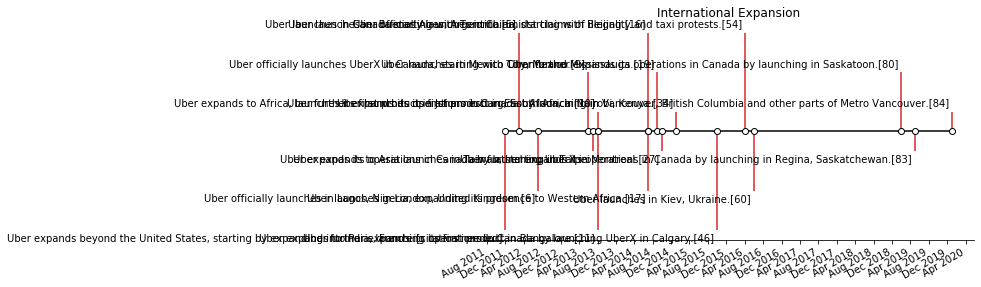

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pycountry

international_expansion_events = events_sorted_by_category['International expansion']

dates = [event['date'] for event in international_expansion_events]
texts = [event['text'] for event in international_expansion_events]

levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4))
ax.set(title='International Expansion')

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, texts, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()